## 1 Preliminaries                          

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gawron/python-for-social-science/blob/master/pandas/pandas_assignment.ipynb)

In [135]:
# The usual preamble
import pandas as pd
import matplotlib as mlp
from matplotlib import pyplot as plt
%matplotlib inline
# Make the graphs a bit prettier, and bigger
#pd.set_option('display.mpl_style', 'default') 
#pd.set_option('display.line_width', 5000) 
pd.set_option('display.max_columns', 60) 

#figsize(15, 5)

We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [136]:
import pandas as pd
url = 'https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/_static/names/yob2000.txt'
names2000 = pd.read_csv(url,names=['name','sex','births'])

In [137]:
names2000

,name,sex,births
0,Emily,F,25949
1,Hannah,F,23066
2,Madison,F,19965
3,Ashley,F,17991
4,Sarah,F,17677
...,...,...,...
29753,Zeph,M,5
29754,Zeven,M,5
29755,Ziggy,M,5
29756,Zo,M,5


---

## Basic Pandas skills (Baby names data)

###  2.1 Selecting columns and rows

In next cell, write an expression that returns a `pandas` `Series` with just the names in the `name` column.

In [138]:
# Display only names in the name column using the dataframe:
names = pd.DataFrame(names2000)

names["name"]

0          Emily
1         Hannah
2        Madison
3         Ashley
4          Sarah
          ...   
29753       Zeph
29754      Zeven
29755      Ziggy
29756         Zo
29757      Zyier
Name: name, Length: 29758, dtype: object

In the next cell, write an expression that returns the first 25 rows of the `names2000` dataframe,

In [139]:
# Display First 25 rows of the names2000 dataframe:
names[:25]

,name,sex,births
0,Emily,F,25949
1,Hannah,F,23066
2,Madison,F,19965
3,Ashley,F,17991
4,Sarah,F,17677
5,Alexis,F,17622
6,Samantha,F,17262
7,Jessica,F,15698
8,Elizabeth,F,15077
9,Taylor,F,15076


In the next cell write an expression that returns the first 25 row of the `name` column.

In [140]:
# Display First 25 rows of the 'name' column in dataframe:
names["name"][:25]

0         Emily
1        Hannah
2       Madison
3        Ashley
4         Sarah
5        Alexis
6      Samantha
7       Jessica
8     Elizabeth
9        Taylor
10       Lauren
11       Alyssa
12        Kayla
13      Abigail
14      Brianna
15       Olivia
16         Emma
17        Megan
18        Grace
19     Victoria
20       Rachel
21         Anna
22       Sydney
23      Destiny
24       Morgan
Name: name, dtype: object

---

###  2.2 Selecting multiple columns

What if we just want to know the gender and the birth counts, but not the name? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.  Write an expression that that returns a data frame with just the `births` and `sex` columns of the `names2000` dataframe.

In [141]:
# Display only 'births' and 'sex' columns of the names2000 dataframe:
names[["births", "sex"]]

,births,sex
0,25949,F
1,23066,F
2,19965,F
3,17991,F
4,17677,F
...,...,...
29753,5,M
29754,5,M
29755,5,M
29756,5,M


Now write an expression that returns just the first ten rows of the dataframe you returned the cell above. 

In [142]:
# Display only First 10 rows of the 'births' and 'sex' columns of the names2000 dataframe:
names[["births", "sex"]][:10]

,births,sex
0,25949,F
1,23066,F
2,19965,F
3,17991,F
4,17677,F
5,17622,F
6,17262,F
7,15698,F
8,15077,F
9,15076,F


---

### 2.3 Plotting

Write some lines of code that do a barplot of the first fifteen rows of the `names2000` dataframe.  Make sure the `x`-axis shows the name associated with each bar (and not just an arbitrary integer).

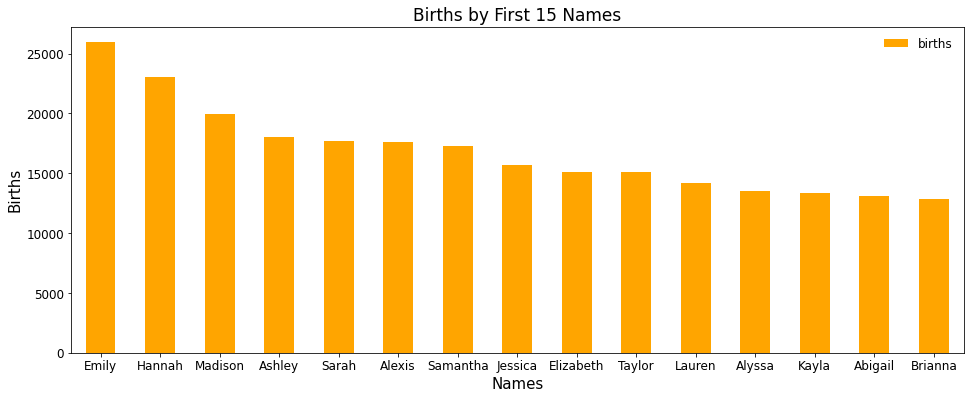

In [143]:
# Display the First Fifteen rows of the names2000 dataframe using Matplotlib:

names_15 = names2000[["name", "births"]][:15]

names_15.plot(kind = "bar", x = "name", y = "births", figsize = (16,6), color = 'orange')

plt.xlabel("Names", fontsize = 15)
plt.ylabel("Births", fontsize = 15)

plt.xticks(rotation = 0)
plt.tick_params(which='major', labelsize = 12)

plt.title("Births by First 15 Names", fontsize = 17)
plt.legend(frameon=False, loc="upper right", prop={'size': 12})
plt.show()

---

## 3 Aggregation (Service requests data)

The following code loads the service requests data used in one of your pandas notebooks, and creates 
a subtable consisting of the data for just three agencies.  It then adds a **new** column called `Count`,
which we're going to use for counting complaints.  Since each row represents exactly one complain,
the value in the `Count` column is always 1.

You can learn more about this data set in the [pandas pivot and merge notebook.](https://github.com/gawron/python-for-social-science/blob/master/pandas/pandas_pivot_and_merge.ipynb)

In [144]:
import pandas as pd
fn = '311-service-requests.csv'
base_url = 'https://github.com/gawron/pandas-cookbook/master/data'
path = f'{base_url}/{fn}'
raw_path = path.replace('github.com','raw.githubusercontent.com')
complaints = pd.read_csv(raw_path,error_bad_lines=False)
complaints['Count'] = 1

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Looking at the `Count` column:

In [145]:
complaints['Count'][:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Count, dtype: int64

The following code creates a subtable with just the complaints for the following three
agencies: `DOT`, `DOP`, and `NYPD`.

In [146]:
pt00 = complaints[complaints.Agency.isin(['DOT', "DOP", 'NYPD'])]
pt00

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Count
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432.0,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)",1
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378.0,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)",1
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032.0,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)",1
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023.0,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)",1
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372.0,37 AVENUE,37 AVENUE,84 STREET,85 STREET,NaN,NaN,BLOCKFACE,JACKSON HEIGHTS,NaN,Precinct,Open,10/31/2013 09:46:52 AM,NaN,03 QUEENS,QUEENS,1016948.0,212540.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.749989,-73.881988,"(40.7499893014072, -73.88198770727831)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111061,26426164,10/04/2013 12:03:00 AM,10/04/2013 02:14:57 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11106.0,30-09 BROADWAY,BROADWAY,30 STREET,31 ST

Your mission should you decide to accept it is to create pivot table whose rows are the three agencies,
and whose columns are the complaint types.  Each cell in the table thus contains the total number of complaints
of that complaint type for that agency.  For example, in the NYPD row, the Animal Abuse column should
have the number 164, meaning that 164 animal abuse complaints were made to NYPD.


In [147]:
# Pivot Table for the Dataframe where Rows include 3 Agencies: 'DOT', 'DOP', 'NYPD' and Columns include: 'Complaint Type':
# For the values, we have done Summation of 'Count' field, for getting the total Complaints.

df_pt00 = pt00.pivot_table('Count', 'Agency',
                           columns ='Complaint Type', aggfunc=sum)

df_pt00

Complaint Type,Agency Issues,Animal Abuse,Bike Rack Condition,Bike/Roller/Skate Chronic,Blocked Driveway,Bridge Condition,Broken Muni Meter,Bus Stop Shelter Placement,Compliment,Curb Condition,DOT Literature Request,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Ferry Inquiry,Ferry Permit,Graffiti,Highway Condition,Highway Sign - Damaged,Homeless Encampment,Illegal Fireworks,Illegal Parking,Invitation,Municipal Parking Facility,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Parking Card,Posting Advertisement,Public Toilet,Request for Information,Sidewalk Condition,Street Condition,Street Light Condition,Street Sign - Damaged,Street Sign - Dangling,Street Sign - Missing,Traffic,Traffic Signal Condition,Tunnel Condition,Urinating in Public,Vending
Agency,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DOP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DOT,20.0,NaN,7.0,NaN,NaN,20.0,2070.0,14.0,1.0,66.0,123.0,NaN,NaN,NaN,4.0,32.0,1.0,NaN,130.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,6.0,NaN,339.0,3473.0,7117.0,691.0,110.0,327.0,NaN,3145.0,1.0,NaN,NaN
NYPD,NaN,164.0,NaN,32.0,4590.0,NaN,NaN,NaN,NaN,NaN,NaN,803.0,26.0,83.0,NaN,NaN,NaN,13.0,NaN,NaN,269.0,3.0,3343.0,NaN,NaN,2578.0,67.0,191.0,1928.0,750.0,23.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,NaN,NaN,30.0,229.0


---

## 4.  Baby names

In [148]:
# Importaing the Baby Names Dataset:
import urllib.request
import tarfile
import os.path

base = 'baby_names'
fn = f'{base}.tar.gz'
url = f'https://github.com/gawron/python-for-social-science/blob/master/pandas/{fn}'

thetarfile = url.replace('github','raw.githubusercontent')
thetarfile = thetarfile.replace('blob/','')

In [149]:
thetarfile

'https://raw.githubusercontent.com/gawron/python-for-social-science/master/pandas/baby_names.tar.gz'

In [150]:
working_dir = '/content/gdrive/My Drive/'
data_dir = os.path.join(working_dir,'data')
try:
  os.makedirs(data_dir)
except:
  pass
os.chdir(data_dir)

with urllib.request.urlopen(thetarfile) as tarhandle:
  thetarstream = tarfile.open(fileobj=tarhandle, mode="r|gz")
  thetarstream.extractall()

In [151]:
import pandas as pd
years = list(range(1880,2011))
pieces = []
columns = ['name','sex','births']
    
for year in years:
    path = f'names/yob{year:d}.txt'
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)    
    
names = pd.concat(pieces, ignore_index=True)

In [152]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


---

### 4.1: 

Use the babynames data created in the [general pandas intro notebook.](https://github.com/gawron/python-for-social-science/blob/master/pandas/general_pandas_intro.ipynb)
     and matplotlib to plot male and female
    births for the years covered in the data. Put this in
    a `jupyter notebook` file.  In the same notebook, use the babynames data to get a list of male and female names.
    

In [153]:
# Dataframe for Male and Female Births for all the Years covered in the data:

yearly_births_by_sex = names.pivot_table('births','year', 
                                 columns='sex', aggfunc=sum)
yearly_births_by_sex

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


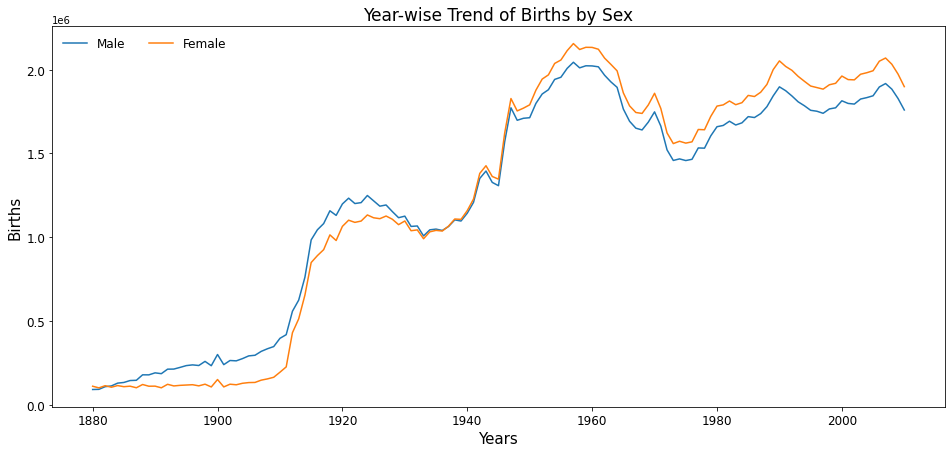

In [154]:
# Plotting the Graph using Matplotlib:

yearly_births_by_sex.plot(title='Total births by year', figsize = (16,7))

plt.xlabel("Years", fontsize = 15)
plt.ylabel("Births", fontsize = 15)

plt.xticks(rotation = 0)
plt.tick_params(which='major', labelsize = 12)

plt.title("Year-wise Trend of Births by Sex", fontsize = 17)
plt.legend(labels = ['Male', 'Female'], frameon=False, loc="upper left", prop={'size': 12}, ncol=2)
plt.show()

In [155]:
# List of Male Names:
Male_Names = names[names['sex']=='M']['name']
list(Male_Names)

['John',
 'William',
 'James',
 'Charles',
 'George',
 'Frank',
 'Joseph',
 'Thomas',
 'Henry',
 'Robert',
 'Edward',
 'Harry',
 'Walter',
 'Arthur',
 'Fred',
 'Albert',
 'Samuel',
 'David',
 'Louis',
 'Joe',
 'Charlie',
 'Clarence',
 'Richard',
 'Andrew',
 'Daniel',
 'Ernest',
 'Will',
 'Jesse',
 'Oscar',
 'Lewis',
 'Peter',
 'Benjamin',
 'Frederick',
 'Willie',
 'Alfred',
 'Sam',
 'Roy',
 'Herbert',
 'Jacob',
 'Tom',
 'Elmer',
 'Carl',
 'Lee',
 'Howard',
 'Martin',
 'Michael',
 'Bert',
 'Herman',
 'Jim',
 'Francis',
 'Harvey',
 'Earl',
 'Eugene',
 'Ralph',
 'Ed',
 'Claude',
 'Edwin',
 'Ben',
 'Charley',
 'Paul',
 'Edgar',
 'Isaac',
 'Otto',
 'Luther',
 'Lawrence',
 'Ira',
 'Patrick',
 'Guy',
 'Oliver',
 'Theodore',
 'Hugh',
 'Clyde',
 'Alexander',
 'August',
 'Floyd',
 'Homer',
 'Jack',
 'Leonard',
 'Horace',
 'Marion',
 'Philip',
 'Allen',
 'Archie',
 'Stephen',
 'Chester',
 'Willis',
 'Raymond',
 'Rufus',
 'Warren',
 'Jessie',
 'Milton',
 'Alex',
 'Leo',
 'Julius',
 'Ray',
 'Sidney

In [156]:
# List of Female Names:
Female_Names = names[names['sex']=='F']['name']
list(Female_Names)

['Mary',
 'Anna',
 'Emma',
 'Elizabeth',
 'Minnie',
 'Margaret',
 'Ida',
 'Alice',
 'Bertha',
 'Sarah',
 'Annie',
 'Clara',
 'Ella',
 'Florence',
 'Cora',
 'Martha',
 'Laura',
 'Nellie',
 'Grace',
 'Carrie',
 'Maude',
 'Mabel',
 'Bessie',
 'Jennie',
 'Gertrude',
 'Julia',
 'Hattie',
 'Edith',
 'Mattie',
 'Rose',
 'Catherine',
 'Lillian',
 'Ada',
 'Lillie',
 'Helen',
 'Jessie',
 'Louise',
 'Ethel',
 'Lula',
 'Myrtle',
 'Eva',
 'Frances',
 'Lena',
 'Lucy',
 'Edna',
 'Maggie',
 'Pearl',
 'Daisy',
 'Fannie',
 'Josephine',
 'Dora',
 'Rosa',
 'Katherine',
 'Agnes',
 'Marie',
 'Nora',
 'May',
 'Mamie',
 'Blanche',
 'Stella',
 'Ellen',
 'Nancy',
 'Effie',
 'Sallie',
 'Nettie',
 'Della',
 'Lizzie',
 'Flora',
 'Susie',
 'Maud',
 'Mae',
 'Etta',
 'Harriet',
 'Sadie',
 'Caroline',
 'Katie',
 'Lydia',
 'Elsie',
 'Kate',
 'Susan',
 'Mollie',
 'Alma',
 'Addie',
 'Georgia',
 'Eliza',
 'Lulu',
 'Nannie',
 'Lottie',
 'Amanda',
 'Belle',
 'Charlotte',
 'Rebecca',
 'Ruth',
 'Viola',
 'Olive',
 'Amelia',
 

---

### 4.2

Aggregate the data for all years from the website
    (see the examples in the 
    Pandas notebook [general_pandas_intro.](https://github.com/gawron/python-for-social-science/blob/master/pandas/general_pandas_intro.ipynb>)
    Find the **set** of all male names and the **set**
    of all female names. 
    For each letter find its frequency as a last letter in
    male names and in female names, using 
    Python Counters (`from collections import Counter`).
    Use matplotlib to draw a single plot that  shows
    contrast between the last-letter frequencies 
    for male and female names; x-axis is letters;
    y-axis is frequencies.

    

In [157]:
# Creating the Resultant Data-Frame:

from collections import Counter

# Calculating Male Names & Female Names
Male_Names = names[names['sex']=='M']['name']
Female_Names = names[names['sex']=='F']['name']


# Separating Set of Male Names List
Male_Names_Set = list(set(Male_Names))
for i in range(len(Male_Names_Set)):
    Male_Names_Set[i] = Male_Names_Set[i].lower()


# Separating Set of Female Names List
Female_Names_Set = list(set(Female_Names))
for i in range(len(Female_Names_Set)):
    Female_Names_Set[i] = Female_Names_Set[i].lower()


# Calculating Frequency
freq_Male_Names = Counter([w[-1:] for w in Male_Names if w[-1:].isalpha()])
freq_Female_Names = Counter([w[-1:] for w in Female_Names if w[-1:].isalpha()])


# Creating result Data Frame
freq_last_letter = pd.DataFrame({
    'Male_names_frequency': Counter(freq_Male_Names),
    'Female_names_frequency': Counter(freq_Female_Names)},
    index = list('abcdefghijklmnopqrstuvwxyz'))

freq_last_letter

,Male_names_frequency,Female_names_frequency
a,24595,423070
b,3229,441
c,5040,760
d,36846,6472
e,89654,226579
f,3049,125
g,5079,1736
h,17496,38391
i,17257,44045
j,1200,157


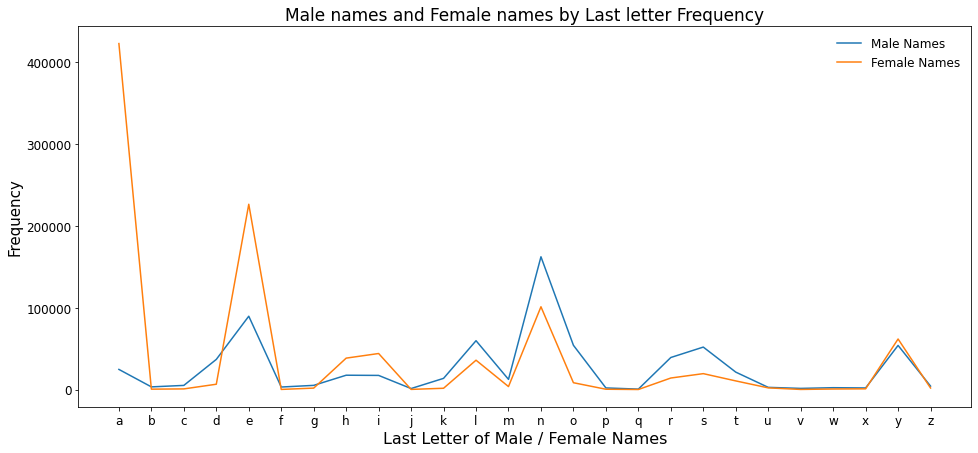

In [158]:
# Plotting the graph for frequency as a last letter in Male names and Female names:

fig, ax = plt.subplots(figsize = (16,7))

ax.plot(freq_last_letter.index, freq_last_letter['Male_names_frequency'])
ax.plot(freq_last_letter.index, freq_last_letter['Female_names_frequency'])

plt.xlabel("Last Letter of Male / Female Names", fontsize = 16)
plt.ylabel("Frequency", fontsize = 15)

plt.xticks(rotation = 0)
plt.tick_params(which='major', labelsize = 12)

plt.title("Male names and Female names by Last letter Frequency", fontsize = 17)
plt.legend(labels = ['Male Names', 'Female Names'], frameon=False, loc='upper right', prop={'size': 12})
plt.show()

---

### 4.3

Another plot.  The x-axis is names;
    the y-axis is frequencies.  Aggregate the data for female names into
    decades (10 year increments).  Produce a plot
    that contains an 1880s line, a 1940s line, and 
    a 1990s line.  There is a display issue here.  There
    are too many names to just write them out on the
    x-axis.  Try to devise an informative way of displaying
    the data that tells a story about fashions in names change.   Hint: Pick a value for n and consider the n most popular names in a decade.  But which decade?

### **NOTE:**

#### **Observation:**
- Here, as we can see above in the problem, we can have two possible graphs for this question, as per my understanding.
- First graph: will be the **Top-15 Common Female Names which will be repeating in each Decade (1990s, 1940s and 1880s)**.
- Second graph: will be the **Top-10 Common Female Names for Each Individual Decade (Top-10 for 1990s, Top-10 for 1940s, Top-10 for 1880s)**.
- In Second Graph, the Top-10 Female Names for every Decade may repeat/may not repeat with each other. **Reason being, we are considering Top-10 Female Names based on their Births Frequency**.

In [159]:
# Creating dataframes for 3 decades - 1880s, 1940s and 1990s :

# Calculating All Decades  : 1880 to 1889, 1940 to 1949 and 1990 to 1999
decade_1880 = names[(names.year >= 1880) & (names.year < 1890) & (names.sex == 'F')][['name','births']]
decade_1940 = names[(names.year >= 1940) & (names.year < 1950) & (names.sex == 'F')][['name','births']]
decade_1990 = names[(names.year >= 1990) & (names.year < 2000) & (names.sex == 'F')][['name','births']]


# Grouping All Decades using 'Births' based on 'Name' column:
decade_1880 = decade_1880.groupby(['name']).sum()
decade_1940 = decade_1940.groupby(['name']).sum()
decade_1990 = decade_1990.groupby(['name']).sum()


# Sorting the Data-frame in DESC Order of the 'Births' field:
decade_1880 = decade_1880.sort_values(by='births', ascending=False)
decade_1940 = decade_1940.sort_values(by='births', ascending=False)
decade_1990 = decade_1990.sort_values(by='births', ascending=False)


# Checking the size of all Decade's Names to finalize the biggest decade for comparing with other two decades:
print("1880s Names:",decade_1880.size,", 1940s Names:",decade_1940.size,", 1990s Names:",decade_1990.size)

1880s Names: 2060 , 1940s Names: 9676 , 1990s Names: 30831


### **Qustion: But which decade to consider?**

#### **Explanation:**
- Here, as we can see above, the decade of 1990s contains the LARGEST female Names Data as compared to other two decades.
- So, we are considering 1990s decade as our primary decade for comparing and then checking if there are any of the Female Names repeted into the other decades (1940s and 1880s) from the 1990s decade.

In [160]:
# Defining function for Finding all Common Female Names between all 3 Decades:

# Finding all Female Mames from the All decades, using the index field of the data-frame:
decade_1990_index = decade_1990.index
decade_1940_index = decade_1940.index
decade_1880_index = decade_1880.index

#---------------------------------------------------------------------------------------------------------------------#

### Finding the Female Names which were common in all 3 Decades, by using Set Intersection method:

# Common Female Names between 1990 and 1940 decades:
Common_1990_1940 = decade_1940_index.intersection(decade_1990_index)

# Common Female Names between 1990, 1940 and 1880 decades:
Common_All_Decades = Common_1990_1940.intersection(decade_1880_index)

# Total Common Female Names between all the Decades (1990s, 1940s, 1880s) are:
print("Total Common Names between all the Decades: ", len(Common_All_Decades))

Total Common Names between all the Decades:  1343


### **Qustion: Pick a value for n and consider the n most popular names in a decade**

#### **Explanation:**
- Here, we are considering TOP 15 Female Names, based on their Birth Frequency. 
- We are referring to these names from the data which we have calculated as the 'Common Female Names in All Decades' i.e. **1343** Female Names are common in all Decades.

### **Graph - 1 : Considering "ONLY TOP 15 COMMON Female Names" between all 3 Decades:**

In [161]:
# Graph - 1 : Considering "ONLY TOP 15 COMMON Female Names" between all 3 Decades:
# Here we are considering TOP 15 (N = 15) Female Names
# Sorting Order: ASCENDING Order based on Female Names


# Saving the TOP 15 Names into the Resultant Data-frame:
Common_All_Decades = decade_1990[decade_1990.index.isin(Common_All_Decades)][:15].index


# Checking for the TOP 15 Names in Common 1343 Female Names into all Decades, for plotting them:
Top_15_1990 = decade_1990[decade_1990_index.isin(Common_All_Decades)][:15].sort_index()
Top_15_1940 = decade_1940[decade_1940_index.isin(Common_All_Decades)][:15].sort_index()
Top_15_1880 = decade_1880[decade_1880_index.isin(Common_All_Decades)][:15].sort_index()


# Creating result Data Frame
print(decade_1990[decade_1990_index.isin(Common_All_Decades)][:15])
print(decade_1940[decade_1940_index.isin(Common_All_Decades)][:15])
print(decade_1880[decade_1880_index.isin(Common_All_Decades)][:15])

           births
name             
Jessica    303008
Emily      237189
Sarah      224091
Samantha   223963
Amanda     190962
Elizabeth  172484
Hannah     158706
Rachel     148985
Victoria   117423
Amber      115581
Courtney   113270
Rebecca    109572
Katherine   96839
Melissa     89955
Anna        78392
           births
name             
Elizabeth  116512
Rebecca     45299
Anna        41288
Sarah       39954
Katherine   39908
Victoria    20749
Rachel      13406
Emily       13401
Melissa      2840
Amanda       2758
Jessica      2202
Hannah       1774
Amber         538
Courtney      302
Samantha      294
           births
name             
Anna        38159
Elizabeth   25007
Sarah       14715
Katherine    6922
Emily        3368
Amanda       3280
Rebecca      2850
Hannah       2480
Rachel       2128
Victoria     1440
Melissa       427
Samantha      159
Jessica        94
Amber          46
Courtney       37


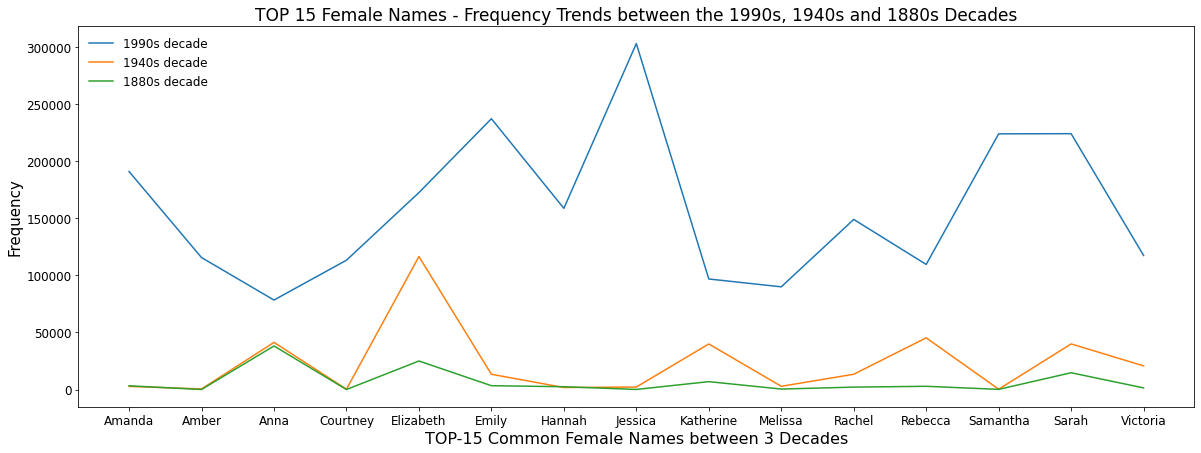

In [162]:
# Plotting the Graph for finding the Trend between the TOP 15 Female Names Common between 1990s, 1940s and 1880s decades:
fig, ax = plt.subplots(figsize = (20,7))

ax.plot(Top_15_1990.index, Top_15_1990['births'])
ax.plot(Top_15_1940.index, Top_15_1940['births'])
ax.plot(Top_15_1880.index, Top_15_1880['births'])

plt.xlabel("TOP-15 Common Female Names between 3 Decades", fontsize = 16)
plt.ylabel("Frequency", fontsize = 15)

plt.xticks(rotation = 0)
plt.tick_params(which='major', labelsize = 12)

plt.title("TOP 15 Female Names - Frequency Trends between the 1990s, 1940s and 1880s Decades", fontsize = 17)
plt.legend(labels = ['1990s decade', '1940s decade', '1880s decade'], frameon=False, loc="upper left", prop={'size': 12})
plt.show()

---

### **Graph - 2 : Considering "TOP 10 Female Names for Each DECADE SEPARATELY":**

In [163]:
# Graph - 2 : Considering "TOP 10 Female Names for EACH DECADE SEPARATELY":
# Here we are considering TOP 10 (N = 10) Female Names 
# Sorting Order: DESCENDING Order based on Births Frequency


# Checking for the TOP 10 Unique Female Names in Each Decade, for plotting them:
decade_1990_Top_10 = decade_1990[:10].sort_values(by='births', ascending=False)
decade_1940_Top_10 = decade_1940[:10].sort_values(by='births', ascending=False)
decade_1880_Top_10 = decade_1880[:10].sort_values(by='births', ascending=False)


# Creating result Data Frame
print(decade_1990_Top_10)
print(decade_1940_Top_10)
print(decade_1880_Top_10)

           births
name             
Jessica    303008
Ashley     301749
Emily      237189
Sarah      224091
Samantha   223963
Amanda     190962
Brittany   190799
Elizabeth  172484
Taylor     169000
Megan      160334
          births
name            
Mary      639863
Linda     531515
Barbara   425141
Patricia  411330
Carol     292250
Sandra    265466
Nancy     251977
Sharon    221186
Judith    217972
Susan     211961
           births
name             
Mary        91672
Anna        38159
Emma        25404
Elizabeth   25007
Margaret    21800
Minnie      21724
Ida         18283
Bertha      18263
Clara       17717
Alice       17141


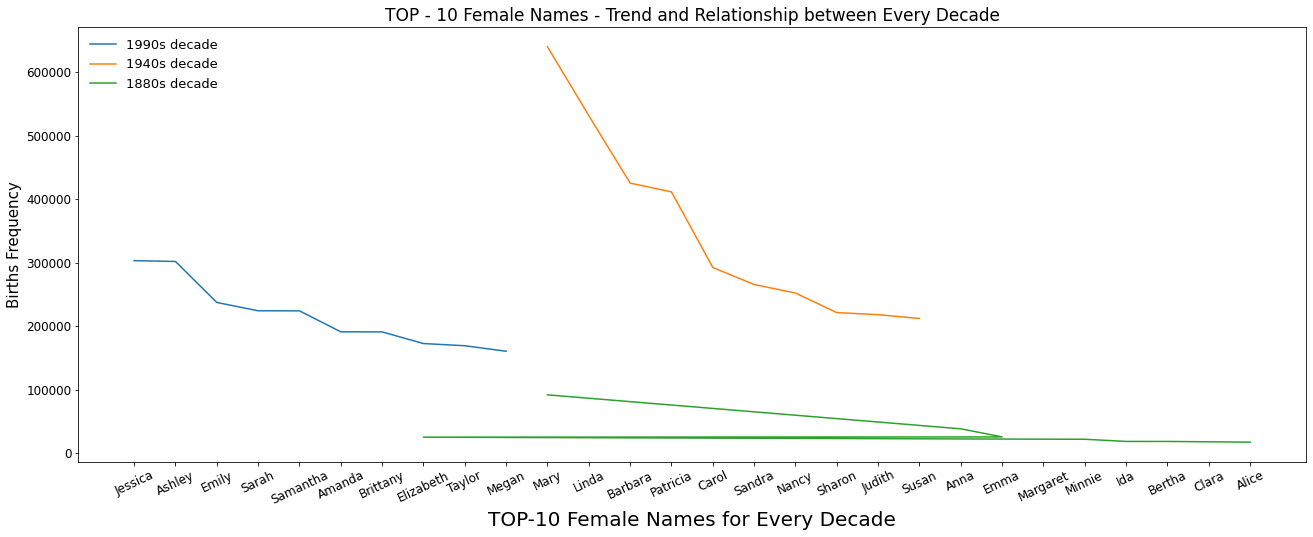

In [164]:
# Plotting the Graph for finding the Trend between the TOP 15 Female Names Common between 1990s, 1940s and 1880s decades:

fig, ax = plt.subplots(figsize = (22,8))
ax.plot(decade_1990_Top_10.index, decade_1990_Top_10['births'])
ax.plot(decade_1940_Top_10.index, decade_1940_Top_10['births'])
ax.plot(decade_1880_Top_10.index, decade_1880_Top_10['births'])

plt.xlabel("TOP-10 Female Names for Every Decade", fontsize = 20)
plt.ylabel("Births Frequency", fontsize = 15)

plt.xticks(rotation = 25)
plt.tick_params(which='major', labelsize = 12)

plt.title("TOP - 10 Female Names - Trend and Relationship between Every Decade", fontsize = 17)
plt.legend(labels = ['1990s decade', '1940s decade', '1880s decade'], frameon=False, loc="upper left", prop={'size': 13})
plt.show()

---

### 4.4 Extra Credit (You can wait until you learn about machine learning to do this)

Train a classifier that distinguishes male names
    from female names.  The features should be the last three
    letters in the names and the first three letters. If a name
    has fewer than six letters, it is okay for a letter to be represented
    both as a first letter and as a last letter.
    (This strategy guarantees that all names have the same length
    representation).  You will have to make a decision about what to do about
    ambiguous names (Lee, Sam, Pat), but don't simply exclude them.
    Note:  There are different interesting ways to deal with this issue, not
    just one answer. You should ask if you are unsure about your
    solution.
    
If a name has fewer than three letters ('Al'), pad it with spaces
    and use the spaces as part of your representation ('Al' => 'Al ') and the first
    three letters are ['A', 'l', ' '] and the last three letters are
    ['A', 'l', ' '].  Separate your names into training and test
    names.  Extra credit.  Does it help to make the decade a feature?
    
Turn  in your  notebook file, showing the code you used to
    complete parts 

---